In [2]:
%pylab inline 
!conda info

Populating the interactive namespace from numpy and matplotlib

     active environment : base37
    active env location : /home/alex/anaconda3/envs/base37
            shell level : 2
       user config file : /home/alex/.condarc
 populated config files : /home/alex/.condarc
          conda version : 4.9.2
    conda-build version : 3.20.5
         python version : 3.8.5.final.0
       virtual packages : __cuda=11.2=0
                          __glibc=2.31=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /home/alex/anaconda3  (writable)
           channel URLs : https://conda.anaconda.org/conda-forge/linux-64
                          https://conda.anaconda.org/conda-forge/noarch
                          https://repo.anaconda.com/pkgs/main/linux-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/linux-64
                          https://repo.ana

In [120]:
def random_signal(x):
    A,w,phi = gen_params()
    return A*np.sin(w*x+phi)

def gen_params():
    w = np.random.uniform(low = 0.05, high = 0.5, size = 1)
    phi = np.random.uniform(low = 0, high = 2*np.pi, size =1) 
    A = np.random.uniform(low = 1e-5, high = 1e+5, size = 1)
    return A,w,phi

def plot_signal(x):
    plt.figure(figsize = (23,3))
    plt.plot(x)
    plt.xlim(0,1024)
    plt.title("Ideal signal", fontsize = 16)
    plt.xlabel("Time samples", fontsize = 14)
    plt.ylabel("Amplitude", fontsize = 14)
    plt.show()

def plot_matrix_signal(x):
    plt.figure(figsize=(23.5,5))
    plt.imshow(x)
    plt.title("Signal matrix",fontsize = 16)
    plt.xlabel("Time samples", fontsize = 14)
    plt.ylabel("Realization", fontsize = 14)

def expand(x):
    return np.squeeze(np.dstack([x]*32)).T

def get_noise(x, SNR):
    signal_power = np.mean(np.abs(x)**2)

    sigma = np.sqrt(signal_power / 10**(SNR/10))
    mu = 0

    noise = np.random.normal(loc = mu, scale = sigma, size = x.shape)
    return noise

def experiment():
    t = np.arange(1,1024)
    s = random_signal(t)
    s = expand(s)
    noise = get_noise(s,10)

    return s, noise

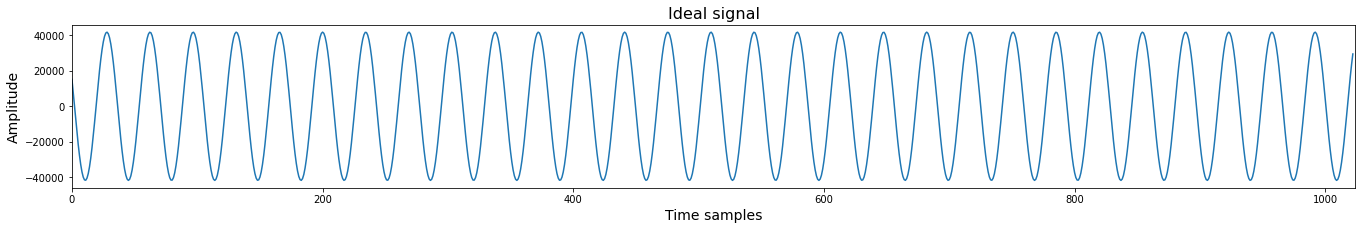

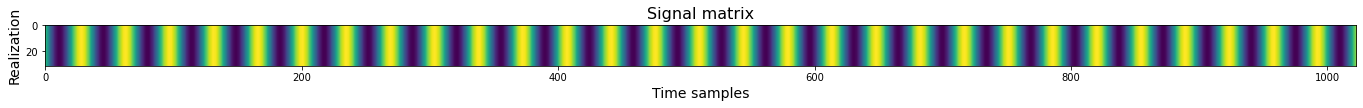

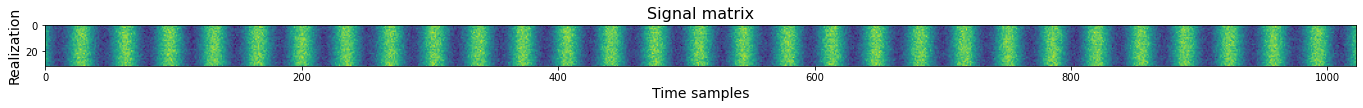

In [119]:
t = np.arange(1,1024)
s = random_signal(t)
plot_signal(s)
s= expand(s)
plot_matrix_signal(s)
noise = get_noise(s,10)
s+=noise 
plot_matrix_signal(s)

In [122]:
s,n = experiment()

(32, 1023)